In [146]:
from functools import partial
import pandas, csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import roc_curve, auc, hamming_loss, zero_one_loss, \
    jaccard_similarity_score, precision_score, recall_score, roc_auc_score, make_scorer, f1_score
from sklearn.cross_validation import StratifiedKFold as SKF, cross_val_score, KFold
from sklearn import cross_validation
from scipy.special import expit
from sklearn.multiclass import OneVsRestClassifier
from MLC_LabelsetStratify import LabelsetKFold
from pandas import DataFrame as DF
import EPCC
import MLCCommon

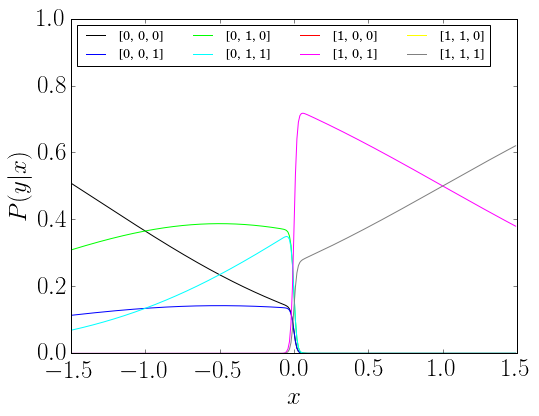

In [255]:
import ModelData
reload(ModelData)      

m = 1000

# Model data
Xm, Ym = ModelData.get(m)

# Enable to show and save a chart
ModelData.plotDistribution()

# Number of classes
l = ModelData.l

In [256]:
estimator = LR(class_weight = 'balanced', fit_intercept = True, solver='liblinear', n_jobs=3, penalty='l2')
#estimator = RF(n_estimators = 100, n_jobs = 3)

In [257]:
cv = cross_validation.ShuffleSplit(Xm.shape[0], n_iter=1, test_size=.3, random_state=0)
#cv = LabelsetKFold(Yc, n_folds = 5, random_state = 1)
#cv = KFold(Xc.shape[0], n_folds = , random_state = 179)

In [270]:
reload(EPCC)
reload(MLCCommon)
BR = OneVsRestClassifier(estimator = estimator, n_jobs = 3)
EPCC_ = EPCC.EPCC(estimator = estimator, n_estimators = 6, loss = "Rank")
for ITrain, ITest in cv:
    XTrain, YTrain = Xm[ITrain], Ym[ITrain]
    XTest, YTest = Xm[ITest], Ym[ITest]
    BR.fit(XTrain, YTrain)
    EPCC_.fit(XTrain, YTrain)
    YPred1 = EPCC_.predict(XTest)
    YPred2 = BR.predict_proba(XTest)

[0 2 1]
[0 2 1]
[1 0 2]
[1 2 0]
[1 2 0]
[2 0 1]


0.999955537771
0.999955537771


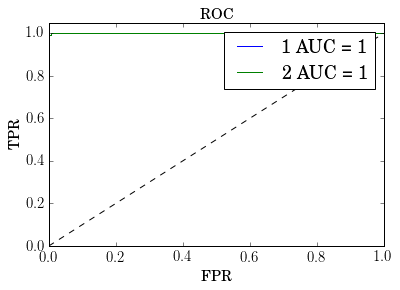

0.624110953058
0.473684210526


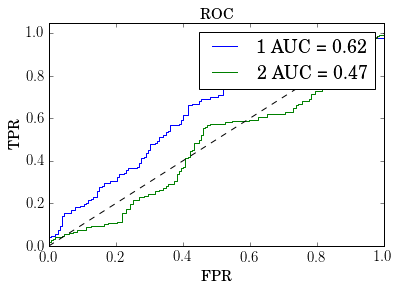

0.912408397703
0.912408397703


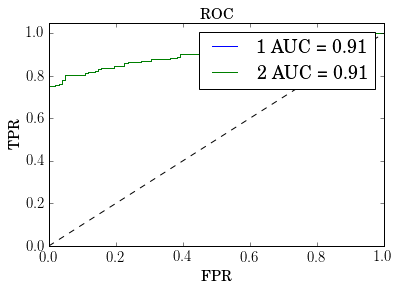

In [271]:
for i in range(l):
        MLCCommon.plotROC(YTest[:, i], [YPred1[:, i], YPred2[:, i]])

# Good results
```
R = 1.5
l = 3
m = 500

def P(x, y):
    f1 = expit(100 * x)
    f2 = expit(x - 2 * y[0] + 1)
    f3 = expit(x + 120 * y[0])
```

f1: sure, f2: depends on f1

In [272]:
DF(Ym).corr()

,0,1,2
0,1.000000,-0.084302,0.705685
1,-0.084302,1.000000,-0.014302
2,0.705685,-0.014302,1.000000
